<a href="https://colab.research.google.com/github/yousef-taheri/Projects/blob/master/Diabetes%20Prediction/Diabetes_Remission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>The objective of this project is to develop practical skills in applying decision trees and random forests to real-world biological data using the scikit-learn Python library.

##Libraries

In [ ]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

##Data

>This is a subset of the [Diabetes  Remission  dataset]( https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). The problem is to predict whether a diabetic patient will experience remission or not after undergoing gastric bypass surgery.


1. **patientsdata.txt** – Contains clinical data for 200 patients, including:  
   - Age (continuous)  
   - HbA1C levels (continuous)  
   - Insulin usage (categorical: yes/no)  
   - Usage of other anti-diabetic drugs (categorical: yes/no)  

2. **patientsclasses.txt** – Contains class labels for the 200 patients:  
   - `0` → Diabetes Remission  
   - `1` → Non-Remission

Read the data:

In [ ]:
data_diabetes = pd.read_table('data/patients_data.txt',sep='\t',header=None)
classes_diabetes = pd.read_table('data/patients_classes.txt',sep='\t',header=None)

#Decision Trees and Random Forest


### 1. Decision trees

Run the classifier

In [ ]:
clf_dtree = tree.DecisionTreeClassifier()
clf_dtree.fit(data_diabetes, classes_diabetes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualize the tree and save it as a .pdf

In [ ]:
feature_names = ['age', 'hba1c', 'insuline taken', 'other drugs taken']
classes = ['DR','NDR']
dot_data = tree.export_graphviz(clf_dtree, out_file=None,
                                feature_names=feature_names,
                                class_names=classes,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("diabetes remission")
from IPython.display import Image
Image(filename='diab_rem_tree.png',retina=True)

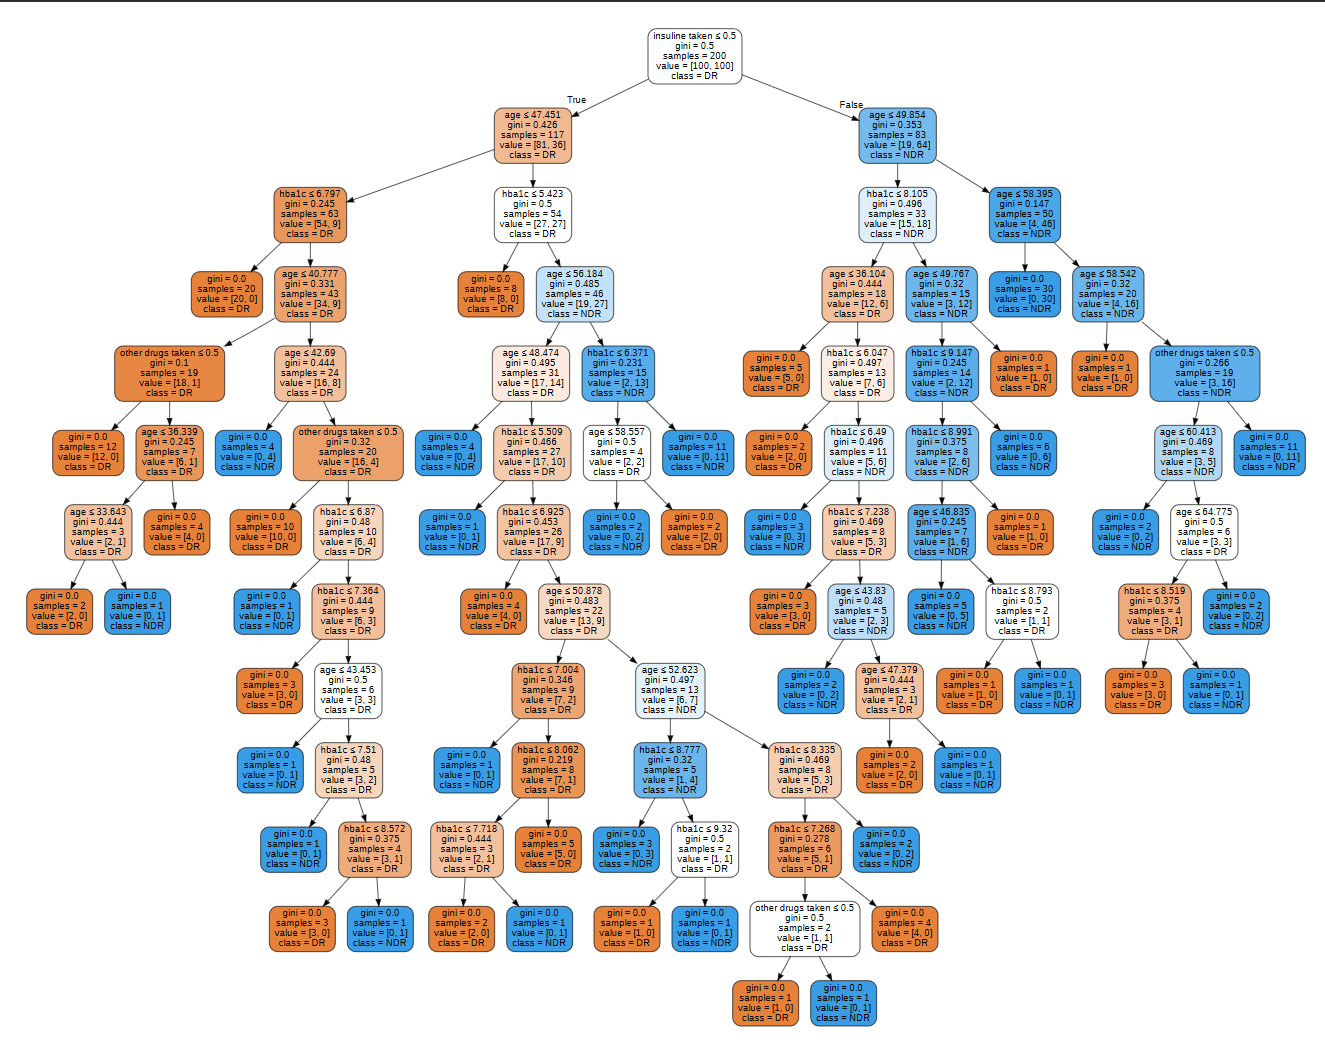

In [ ]:
from IPython.display import Image
Image(filename='diab_rem_tree.png',retina=True)

### 2. Random forest

Run random forest classifier

In [ ]:
clf_rf= RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(data_diabetes, classes_diabetes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Prediction with the random forest:

In [ ]:
clf_rf.predict(data_diabetes)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

Plot the importance of each variable in the model:

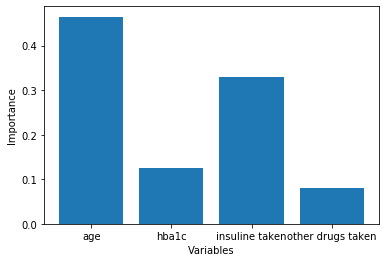

In [ ]:
import matplotlib.pyplot as plt
plt.bar(feature_names,clf_rf.feature_importances_)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

### 3. Interpretable Models:
> Comparison of DT and RF with the state-of-the-art clinical score DiaRem  (Diabetes Remission score) introduced by Still et al., 2013 [[1]](#1).
> For a given patient, if the total score across all clinical variables is less than 7, the patient will be classified as having diabetes remission. Otherwise, they will be assigned to the non-remission class.

<h7>
<a id="1">[1]</a>
Still, Christopher D., et al. "Preoperative prediction of type 2 diabetes remission after Roux-en-Y gastric bypass surgery: a retrospective cohort study." The lancet Diabetes & endocrinology 2.1 (2014): 38-45.</h7>

In [ ]:
#DiaRem class
class DiaRem(object):
  def __init__(self):
    pass
  def scoreFunc(self,v):
    age_score=sum(v[0]>=pd.Series([40,50,60]))
    HbA_score=sum(v[1]>=pd.Series([6.5,7,9]))
    other_drug_score=v[2]*3
    treat_insul_score=v[3]*10
    return age_score+HbA_score+other_drug_score+treat_insul_score
  def scoreCalculater(self,X):
    scores=X.apply(self.scoreFunc,axis=1)
    return scores


  def predict(self,X):
    labels=self.scoreCalculater(X)>7
    return labels.astype(int)

DiaRem_model=DiaRem()

 Compare the predictive power of the decision trees and random forest with the DiaRem

In [ ]:
dtree_preds = clf.predict(data_diabetes)
random_forest_preds = clf_rf.predict(data_diabetes)
DiaRem_prediction = DiaRem_model.predict(data_diabetes)

print("decision tree accuracy score: ", accuracy_score(dtree_preds, classes_diabetes))
print("random forest accuracy score: ", accuracy_score(random_forest_preds, classes_diabetes))
print("DiaRem model  accuracy score: ", accuracy_score(DiaRem_prediction, classes_diabetes))

decision tree accuracy score:  0.82
random forest accuracy score:  0.82
DiaRem model  accuracy score:  0.67
